In [157]:
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import matplotlib.pyplot as plt
from glob import glob
import os
import numpy as np
from PIL import Image

In [80]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

In [203]:
get_event_path = lambda base_dir: glob(os.path.join(base_dir, 'events.out.tfevents.*'))[0]

def get_target_from_events(event_dirs, target_value):
    targets = {}
    for ed in event_dirs:
        tfevent_path = get_event_path(ed)
        event_acc = EventAccumulator(tfevent_path)
        event_acc.Reload()
        x = np.array([e.step for e in event_acc.Scalars(target_value)])
        y = np.array([e.value for e in event_acc.Scalars(target_value)])
        targets[ed] = (x, y)
    return targets

def get_latest_sample_image(base_dir):
    sample_img_paths = glob(os.path.join(base_dir, '*.png'))
    epochs = [int(path.split('/')[-1].split('.')[0]) for path in sample_img_paths]
    idx = np.argmax(epochs)
    return sample_img_paths[idx], epochs[idx]

def get_latest_sample_images(base_dirs, margin=8):
    img_paths = [get_latest_sample_image(d)[0] for d in base_dirs]
    
    images = [Image.open(x) for x in img_paths]
    widths, heights = zip(*(i.size for i in images))

    total_width = sum(widths)
    max_height = max(heights)
    
    new_im = Image.new('RGB', (total_width + margin * (len(widths) - 1), max_height))

    x_offset = 0
    for im in images:
        new_im.paste(im, (x_offset,0))
        x_offset += im.size[0] + margin
    plt.figure(figsize=(20, 20))
    plt.imshow(new_im)
    return new_im

### MRR scan

In [197]:
eds = [f'../tb_named_dir/mrr_scan/mrr={mrr}' for mrr in [0, 0.1, 0.2, 0.3, 0.4, 0.5]]
print(eds)

['../tb_named_dir/mrr_scan/mrr=0', '../tb_named_dir/mrr_scan/mrr=0.1', '../tb_named_dir/mrr_scan/mrr=0.2', '../tb_named_dir/mrr_scan/mrr=0.3', '../tb_named_dir/mrr_scan/mrr=0.4', '../tb_named_dir/mrr_scan/mrr=0.5']


In [132]:
targets = get_target_from_events(eds, 'metric/fid')

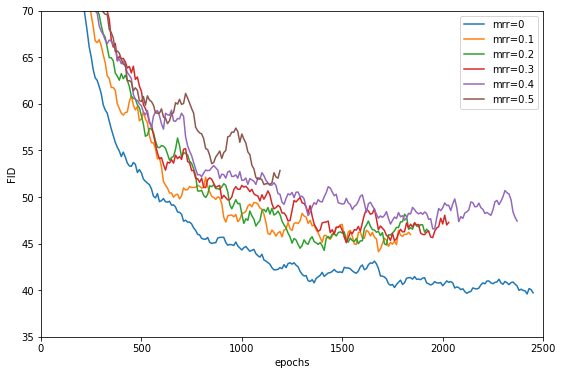

In [133]:
plt.figure(figsize=(9, 6))
min_x, min_y, max_x, max_y = np.inf, np.inf, -np.inf, -np.inf
box_pts = 10
trunc_end = 4

for k, v in targets.items():
    smooth_y = smooth(v[1], box_pts)[:-trunc_end]
    plt.plot(v[0][:len(smooth_y)], smooth_y, label=k.split('/')[-1])
    min_x = min(min_x, min(v[0]))
    max_x = max(max_x, max(v[0]))
    min_y = min(min_y, min(v[1]))
    max_y = max(max_y, max(v[1]))
plt.legend()
plt.xlim([0, 2500])
plt.ylim([35, 70])
plt.xlabel('epochs')
plt.ylabel('FID')

plt.savefig(f'mrr_scan_training_fids.pdf', bbox_inches='tight')

In [134]:
targets = get_target_from_events(eds, 'metric/mmd')

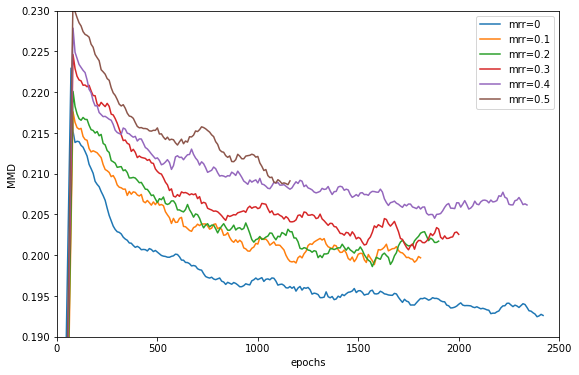

In [135]:
plt.figure(figsize=(9, 6))
min_x, min_y, max_x, max_y = np.inf, np.inf, -np.inf, -np.inf
box_pts = 15
trunc_end = -int(box_pts * 0.5)

for k, v in targets.items():
    smooth_y = smooth(v[1], box_pts)[:trunc_end]
    plt.plot(v[0][:len(smooth_y)], smooth_y, label=k.split('/')[-1])
    min_x = min(min_x, min(v[0]))
    max_x = max(max_x, max(v[0]))
    min_y = min(min_y, min(v[1]))
    max_y = max(max_y, max(v[1]))
plt.legend()
plt.xlim([0, 2500])
plt.ylim([0.19, 0.23])
plt.xlabel('epochs')
plt.ylabel('MMD')

plt.savefig(f'mrr_scan_training_mmds.pdf', bbox_inches='tight')

In [151]:
targets = get_target_from_events(eds, 'stats/mrt')

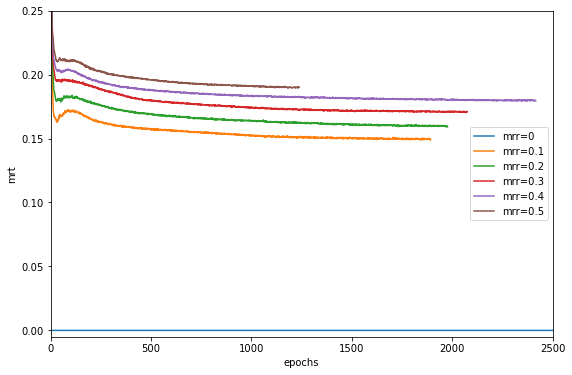

In [156]:
plt.figure(figsize=(9, 6))

for k, v in targets.items():
    plt.plot(v[0], v[1], label=k.split('/')[-1])
    min_x = min(min_x, min(v[0]))
    max_x = max(max_x, max(v[0]))
    min_y = min(min_y, min(v[1]))
    max_y = max(max_y, max(v[1]))
plt.legend()
plt.xlim([0, 2500])
plt.ylim([-0.005, 0.25])
plt.xlabel('epochs')
plt.ylabel('mrt')

plt.savefig(f'mrr_scan_training_mrts.pdf', bbox_inches='tight')

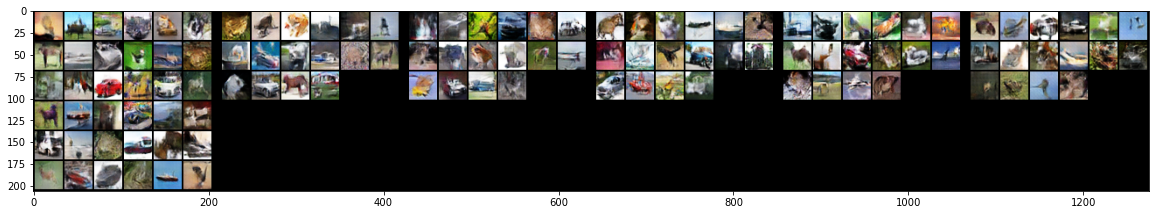

In [199]:
get_latest_sample_images(eds)
plt.savefig('mrr_samples.pdf', bbox_inches='tight')

### MRT scan

In [126]:
%ls ../tb_named_dir/mrt_scan/

mrt=0@  mrt=0.14@  mrt=0.15@  mrt=0.16@  mrt=0.17@


In [200]:
eds = [f'../tb_named_dir/mrt_scan/mrt={mrt}' for mrt in [0, 0.14, 0.15, 0.16, 0.17]]
print(eds)

['../tb_named_dir/mrt_scan/mrt=0', '../tb_named_dir/mrt_scan/mrt=0.14', '../tb_named_dir/mrt_scan/mrt=0.15', '../tb_named_dir/mrt_scan/mrt=0.16', '../tb_named_dir/mrt_scan/mrt=0.17']


In [137]:
targets = get_target_from_events(eds, 'metric/fid')

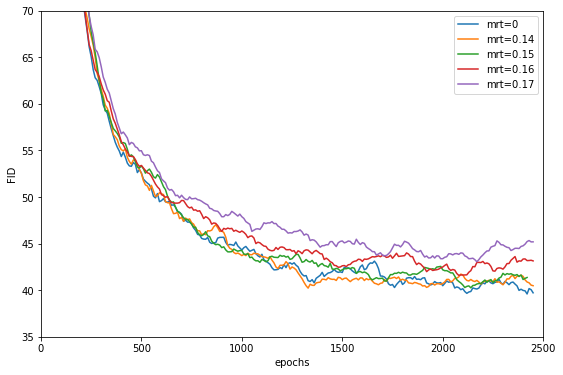

In [138]:
plt.figure(figsize=(9, 6))
box_pts = 10
trunc_end = 4

for k, v in targets.items():
    smooth_y = smooth(v[1], box_pts)[:-trunc_end]
    plt.plot(v[0][:len(smooth_y)], smooth_y, label=k.split('/')[-1])
plt.legend()
plt.xlim([0, 2500])
plt.ylim([35, 70])
plt.xlabel('epochs')
plt.ylabel('FID')

plt.savefig(f'mrt_scan_training_fids.pdf', bbox_inches='tight')

In [139]:
targets = get_target_from_events(eds, 'metric/mmd')

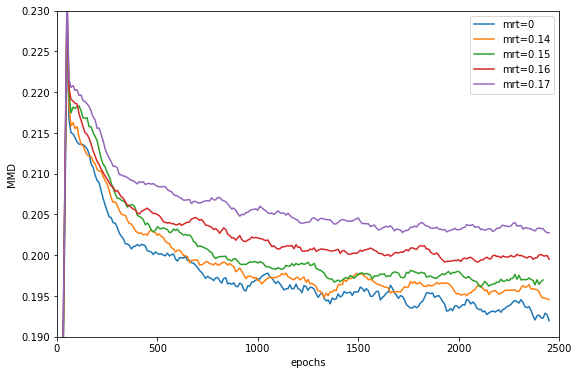

In [141]:
plt.figure(figsize=(9, 6))
min_x, min_y, max_x, max_y = np.inf, np.inf, -np.inf, -np.inf
box_pts = 10
trunc_end = -4

for k, v in targets.items():
    smooth_y = smooth(v[1], box_pts)[:trunc_end]
    plt.plot(v[0][:len(smooth_y)], smooth_y, label=k.split('/')[-1])
    min_x = min(min_x, min(v[0]))
    max_x = max(max_x, max(v[0]))
    min_y = min(min_y, min(v[1]))
    max_y = max(max_y, max(v[1]))
plt.legend()
plt.xlim([0, 2500])
plt.ylim([0.19, 0.23])
plt.xlabel('epochs')
plt.ylabel('MMD')

plt.savefig(f'mrt_scan_training_mmds.pdf', bbox_inches='tight')

In [145]:
targets = get_target_from_events(eds, 'stats/mrr')

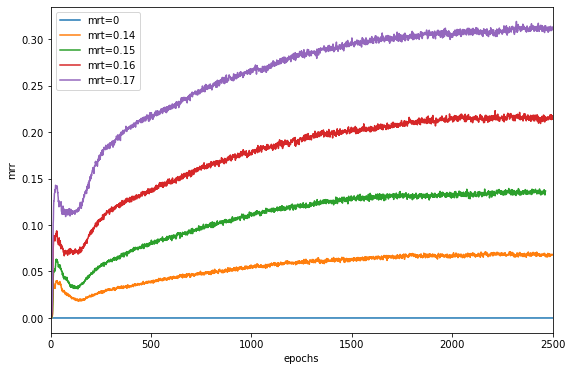

In [148]:
plt.figure(figsize=(9, 6))

for k, v in targets.items():
    plt.plot(v[0], v[1], label=k.split('/')[-1])
    min_x = min(min_x, min(v[0]))
    max_x = max(max_x, max(v[0]))
    min_y = min(min_y, min(v[1]))
    max_y = max(max_y, max(v[1]))
plt.legend()
plt.xlim([0, 2500])
# plt.ylim([0.19, 0.23])
plt.xlabel('epochs')
plt.ylabel('mrr')

plt.savefig(f'mrt_scan_training_mrrs.pdf', bbox_inches='tight')

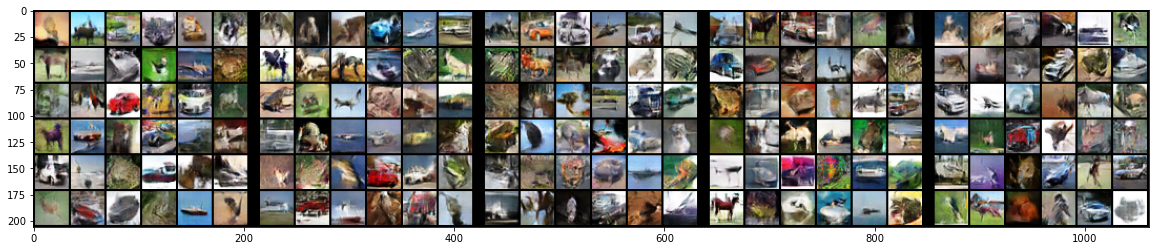

In [201]:
get_latest_sample_images(eds)
plt.savefig('mrt_samples.pdf', bbox_inches='tight')